In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Checking the shape of the dataset

In [4]:
df.shape

(614, 13)

There are 614 rows and 13 columns

checking null values

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# checking NA
df.isna().sum()

# No null and no NA values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Check the data types of the variables
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
#check the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


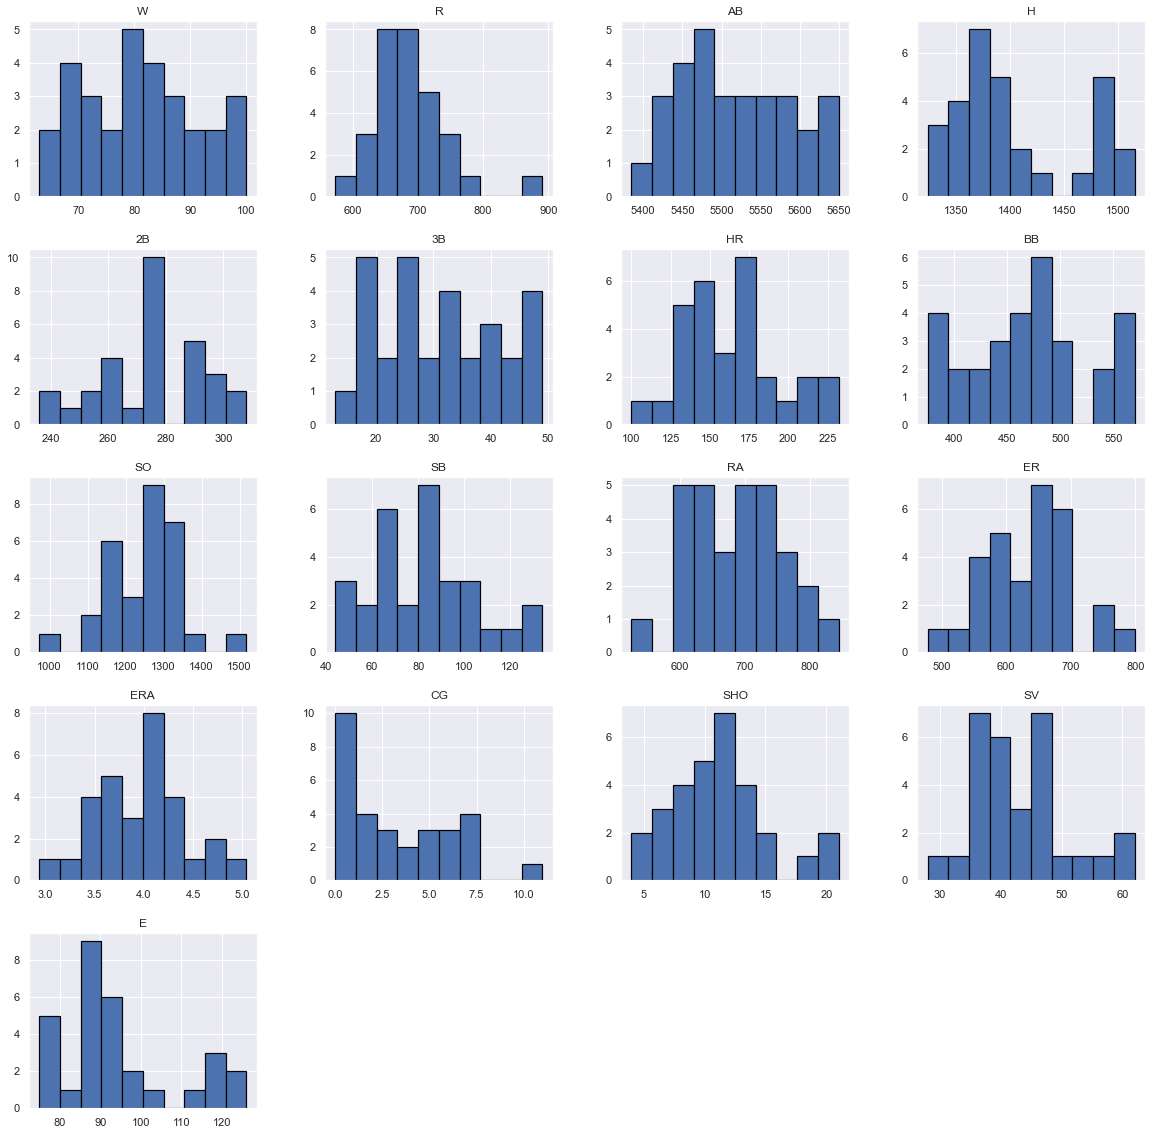

In [9]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [53]:
# Top teams based on different criteria
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


<AxesSubplot:xlabel='Attrition', ylabel='count'>

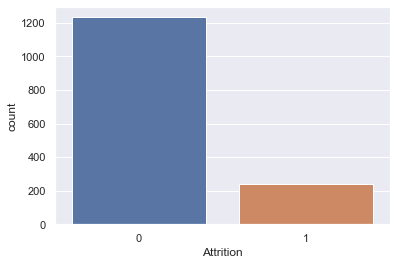

The target value is not balanced it is more towards "No"

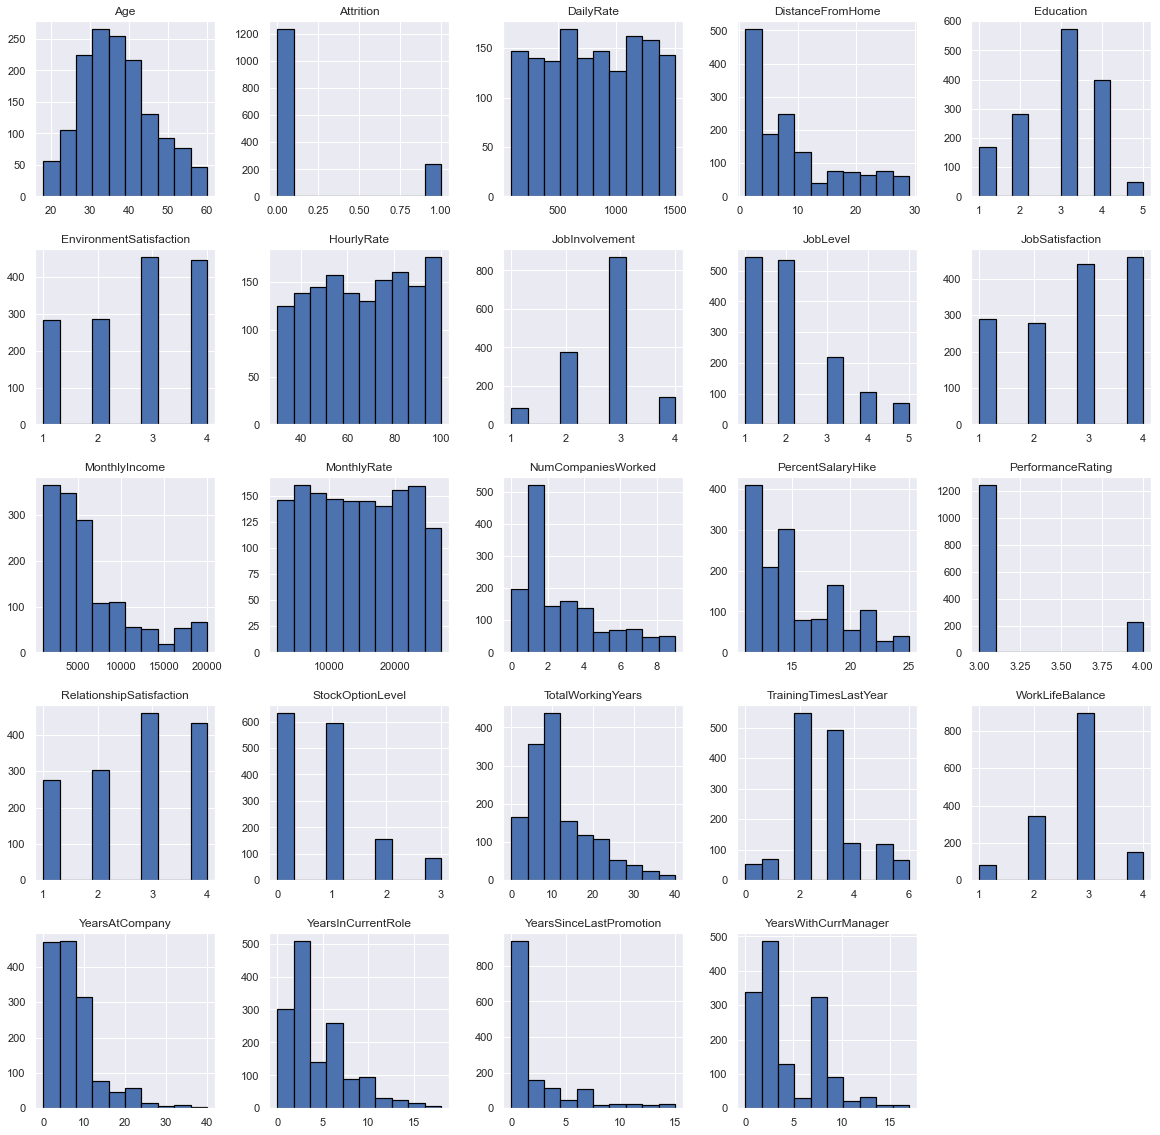

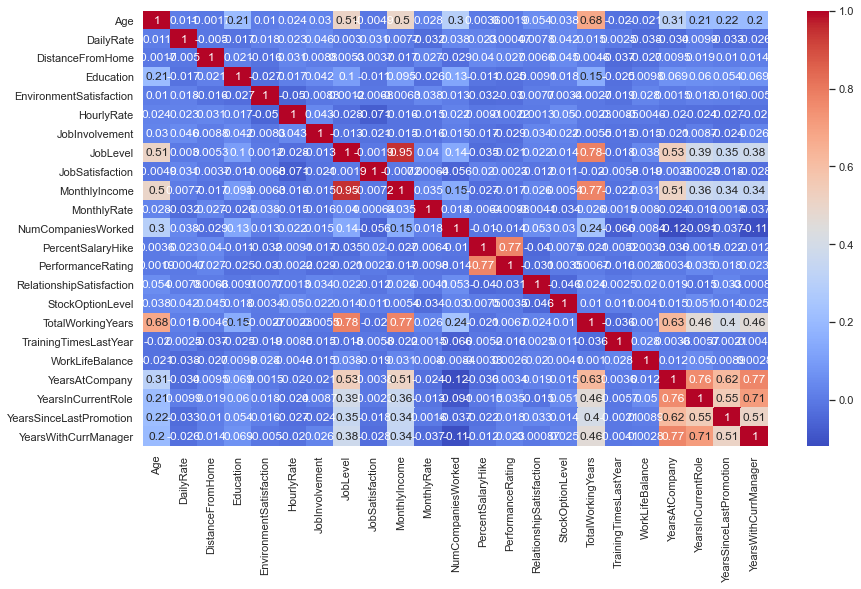

In [48]:
#Pearson Correlation
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='coolwarm')
plt.show()

In [49]:
#Variable separation

numerical_features = ['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel',
                       'JobSatisfaction', 
                       'RelationshipSatisfaction', 
                       'StockOptionLevel',
                        'TrainingTimesLastYear']

categorical_feature = "Sex"

features = numerical_features + [categorical_feature]

target = 'age'

In [50]:
# train test data split

train, test = train_test_split(df, test_size=0.25, random_state=1)
print('Train data points :', len(train))
print('Test data points :', len(test))

Train data points : 1102
Test data points : 368


KeyError: 'age'

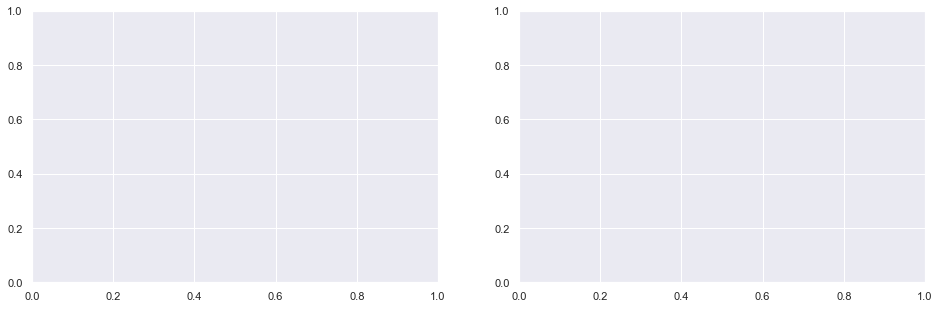

In [51]:
#Target distribution

fig, axes = plt.subplots(ncols=2,figsize=(16, 5))

train[target].plot.hist(color='blue', ax=axes[0])
axes[0].set(title="Train")

test[target].plot.hist(color='blue', ax=axes[1])
axes[1].set(title="Test")

plt.tight_layout()
plt.show()

In [ ]:
#Distribution of the numerical features:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'hist', ax=axes[i], title=c, color='blue', bins=30)
    
plt.tight_layout()
plt.show()

In [ ]:
#Box Plot to check outliers:

fig, axes = plt.subplots(4,2,figsize=(16, 14))
axes = np.ravel(axes)

for i, c in enumerate(numerical_features):
    hist = train[c].plot(kind = 'box', ax=axes[i],color='blue', vert=False)
    axes[i].set_title(c, fontsize=15)
    
plt.tight_layout()
plt.show()

Most of the features contain outliers. Height feature has extreme outliers.

In [ ]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = df[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
              'Generosity','Trust (Government Corruption)','Family']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
sns.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

In [ ]:
# Top Countries based on different criterias
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

To create a model with all features

In [ ]:
def adjustedR2(R2,X,y):
    return (1 - (1-R2)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [ ]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
                   'Generosity','Trust (Government Corruption)','Family']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Happiness Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Family',
      '+',np.round(complex_model_1.coef_[1],4),'* Economy (GDP per Capita)', 
      '+',np.round(complex_model_1.coef_[2],4),'* Health (Life Expectancy)',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Trust (Government Corruption)')

pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Happiness Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Happiness Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Happiness Score']),'.3f'))

artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['Happiness Score']),
                        test_data_dm[independent_var],test_data_dm['Happiness Score']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['Happiness Score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)